In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scipy as sp

In [13]:
sx = 0.5*qt.operators.sigmax()
sy = 0.5*qt.operators.sigmay()
sz = 0.5*qt.operators.sigmaz()
sm = qt.operators.sigmam()
I =  qt.operators.identity(2)

In [9]:
# def hamiltonian_ising(N,omega,delta,V):
#   sx = 0.5*qt.operators.sigmax()
#   sy = qt.operators.sigmay()
#   sz = qt.operators.sigmaz()
#   I = qt.operators.identity(2)

#   ising_ham = qt.tensor([I*0]*N)
#   for i in range(N):
#     hz = qt.tensor([sz if j==i else I for j in range(N)])
#     hx = qt.tensor([sx if j==i else I for j in range(N)])
#     ising_ham += -1*delta*hz+omega*hx
#     for j in range(i + 1, N):
#         # Interaction term between qubit i and qubit j
#         #print(i,j)
#         hzz = qt.tensor([sz if k == i or k == j else I for k in range(N)]) # assume obc
#         ising_ham += (V/N)*hzz
  
#   #print(hz,hx,hzz)
  
#   return(ising_ham)


def hamiltonian_ising(N,omega,delta,V):
  sx = 0.5*qt.operators.sigmax()
  sy = 0.5*qt.operators.sigmay()
  sz = 0.5*qt.operators.sigmaz()
  I = qt.operators.identity(2)

  ising_ham = qt.tensor([I*0]*N)
  for i in range(N):
    hz = qt.tensor([sz if j==i else I for j in range(N)])
    hx = qt.tensor([sx if j==i else I for j in range(N)])
    ising_ham += -1*delta*hz+omega*hx
    for j in range(i + 1, N):
        # Interaction term between qubit i and qubit j
        #print(i,j)
        hzz = qt.tensor([sz if k == i or k == j else I for k in range(N)]) # assume obc
        ising_ham += (V/N)*hzz
  
  #print(hz,hx,hzz)
  
  return(ising_ham)

In [10]:
omega = 1
N = 2
delta = 1
V = 3
hamiltonian=hamiltonian_ising(N,omega,delta,V)

In [11]:
hamiltonian

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-0.625  0.5    0.5    0.   ]
 [ 0.5   -0.375  0.     0.5  ]
 [ 0.5    0.    -0.375  0.5  ]
 [ 0.     0.5    0.5    1.375]]

In [16]:
### checking 2 qubit hamiltonian
qt.tensor(sx,I)+qt.tensor(I,sx)-(qt.tensor(sz,I)+qt.tensor(I,sz))+(3/2)*qt.tensor(sz,sz)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-0.625  0.5    0.5    0.   ]
 [ 0.5   -0.375  0.     0.5  ]
 [ 0.5    0.    -0.375  0.5  ]
 [ 0.     0.5    0.5    1.375]]

In [21]:
kappa = 1
c_ops = [qt.tensor([sm if i==j  else I for j in range(N)]) for i in range(N)]
c_ops = [np.sqrt(kappa) * c_op for c_op in c_ops]
L = qt.liouvillian(hamiltonian, c_ops)
L_dag = qt.liouvillian(hamiltonian, c_ops).dag()

In [22]:
L

Quantum object: dims = [[[2, 2], [2, 2]], [[2, 2], [2, 2]]], shape = (16, 16), type = super, isherm = False
Qobj data =
[[-2. +0.j    0. -0.5j   0. -0.5j   0. +0.j    0. +0.5j   0. +0.j
   0. +0.j    0. +0.j    0. +0.5j   0. +0.j    0. +0.j    0. +0.j
   0. +0.j    0. +0.j    0. +0.j    0. +0.j  ]
 [ 0. -0.5j  -1.5-0.25j  0. +0.j    0. -0.5j   0. +0.j    0. +0.5j
   0. +0.j    0. +0.j    0. +0.j    0. +0.5j   0. +0.j    0. +0.j
   0. +0.j    0. +0.j    0. +0.j    0. +0.j  ]
 [ 0. -0.5j   0. +0.j   -1.5-0.25j  0. -0.5j   0. +0.j    0. +0.j
   0. +0.5j   0. +0.j    0. +0.j    0. +0.j    0. +0.5j   0. +0.j
   0. +0.j    0. +0.j    0. +0.j    0. +0.j  ]
 [ 0. +0.j    0. -0.5j   0. -0.5j  -1. -2.j    0. +0.j    0. +0.j
   0. +0.j    0. +0.5j   0. +0.j    0. +0.j    0. +0.j    0. +0.5j
   0. +0.j    0. +0.j    0. +0.j    0. +0.j  ]
 [ 0. +0.5j   0. +0.j    0. +0.j    0. +0.j   -1.5+0.25j  0. -0.5j
   0. -0.5j   0. +0.j    0. +0.j    0. +0.j    0. +0.j    0. +0.j
   0. +0.5j   0. +0.j    0. +

In [24]:
eigvals,eigmats = L.eigenstates()

In [27]:
eigvals

array([-1.57399404e+00+1.32326328e+00j, -1.57399404e+00-1.32326328e+00j,
       -1.50049854e+00+9.45111551e-16j, -1.24888595e+00-9.16394509e-01j,
       -1.24888595e+00+9.16394509e-01j, -1.18347982e+00+2.20752899e-01j,
       -1.18347982e+00-2.20752899e-01j, -1.17891216e+00+7.24831116e-16j,
       -1.04150755e+00+2.86857516e+00j, -1.04150755e+00-2.86857516e+00j,
       -7.73323335e-01+3.01198657e-16j, -6.58131392e-01+1.66140372e+00j,
       -6.58131392e-01-1.66140372e+00j, -5.67634222e-01-2.00475397e+00j,
       -5.67634222e-01+2.00475397e+00j,  1.24866554e-15+3.03839937e-16j])

In [26]:
idx = np.argsort(abs(eigvals))
idx

array([15, 10,  7,  6,  5,  2,  4,  3, 11, 12,  1,  0, 14, 13,  9,  8],
      dtype=int64)

In [67]:
rho_00 = eigmats[15].full().reshape(2**N,2**N)
np.trace(rho_00)

(1.0148740878189795+0j)

In [35]:
# diagonalization using qutip
val,mat = L_dag.eigenstates()

print('eigenvalues',val)
print('eigenamtrices',mat)

eigenvalues [-1.57399404e+00-1.32326328e+00j -1.57399404e+00+1.32326328e+00j
 -1.50049854e+00+5.60946366e-16j -1.24888595e+00+9.16394509e-01j
 -1.24888595e+00-9.16394509e-01j -1.18347982e+00-2.20752899e-01j
 -1.18347982e+00+2.20752899e-01j -1.17891216e+00-1.50983118e-17j
 -1.04150755e+00-2.86857516e+00j -1.04150755e+00+2.86857516e+00j
 -7.73323335e-01-8.63534685e-16j -6.58131392e-01-1.66140372e+00j
 -6.58131392e-01+1.66140372e+00j -5.67634222e-01-2.00475397e+00j
 -5.67634222e-01+2.00475397e+00j -5.25510634e-17+1.90565975e-16j]
eigenamtrices [Quantum object: dims = [[[2, 2], [2, 2]], [1]], shape = (16, 1), type = operator-ket
 Qobj data =
 [[ 0.6255625 +0.j        ]
  [-0.29953934-0.14327031j]
  [-0.29953934-0.14327031j]
  [ 0.07904894+0.07653094j]
  [ 0.17892948+0.22441543j]
  [-0.0505962 -0.17465753j]
  [-0.07712612-0.16946595j]
  [ 0.00708941+0.06568852j]
  [ 0.17892948+0.22441543j]
  [-0.07712612-0.16946595j]
  [-0.0505962 -0.17465753j]
  [ 0.00708941+0.06568852j]
  [-0.18916114-0.0

In [52]:
tol = 1e-8
real_vals = np.where(np.abs(val.imag)<tol,val.real,val)
real_vals = np.where(np.abs(real_vals.real)<tol,real_vals.imag,real_vals)
print(real_vals)

[-1.57399404-1.32326328j -1.57399404+1.32326328j -1.50049854+0.j
 -1.24888595+0.91639451j -1.24888595-0.91639451j -1.18347982-0.2207529j
 -1.18347982+0.2207529j  -1.17891216+0.j         -1.04150755-2.86857516j
 -1.04150755+2.86857516j -0.77332333+0.j         -0.65813139-1.66140372j
 -0.65813139+1.66140372j -0.56763422-2.00475397j -0.56763422+2.00475397j
  0.        +0.j        ]


In [74]:
l2indx = np.argsort(abs(real_vals))[1]
print(l2indx)

l2 = mat[l2indx].full().reshape(2**N,2**N)
print(np.round(l2,3))

10
[[ 0.665+0.j    -0.166+0.005j -0.166+0.005j  0.017-0.017j]
 [-0.166-0.005j  0.413+0.j     0.13 +0.j    -0.128-0.025j]
 [-0.166-0.005j  0.13 +0.j     0.413+0.j    -0.128-0.025j]
 [ 0.017+0.017j -0.128+0.025j -0.128+0.025j  0.064+0.j   ]]


In [ ]:
# checking
np.trace(np.round(l2,3)*np.round(rho_00,3)) # close to zero

(0.118273+0j)

In [82]:
L2 = qt.Qobj(np.round(l2,3))
alphas,phis = L2.eigenstates()

In [83]:
print(alphas)

[-0.00600969  0.283       0.41097469  0.867035  ]


In [84]:
print(phis)

[Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
 Qobj data =
 [[-0.11016269+0.j        ]
  [-0.24612353+0.05612746j]
  [-0.24612353+0.05612746j]
  [-0.83314878+0.40776603j]]
 Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        +0.j        ]
  [-0.70708259+0.00584891j]
  [ 0.70708259-0.00584891j]
  [ 0.        +0.j        ]]
 Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
 Qobj data =
 [[-0.64789567+0.j        ]
  [-0.48168685-0.03519083j]
  [-0.48168685-0.03519083j]
  [ 0.32871893-0.07519199j]]
 Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.75372103+0.j       ]
  [-0.45002918-0.0220464j]
  [-0.45002918-0.0220464j]
  [ 0.1607938 -0.0050363j]]                                   ]


In [ ]:
init_state = qt.tensor([qt.ket('0')]*N)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [114]:
phi_0 = phis[0]
phi_0.full()

array([[-0.11016269+0.j        ],
       [-0.24612353+0.05612746j],
       [-0.24612353+0.05612746j],
       [-0.83314878+0.40776603j]])

In [128]:
phi0 = qt.Qobj(phi_0)
phi0.dims = [[2,2],[1,1]]
phi0

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[-0.11016269+0.j        ]
 [-0.24612353+0.05612746j]
 [-0.24612353+0.05612746j]
 [-0.83314878+0.40776603j]]

In [121]:
U=np.zeros((2**N,2**N),dtype=complex)
U[:,0]+=phi_0.full().flatten()
print(U)

[[-0.11016269+0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [-0.24612353+0.05612746j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [-0.24612353+0.05612746j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [-0.83314878+0.40776603j  0.        +0.j          0.        +0.j
   0.        +0.j        ]]


In [122]:
U*init_state

array([[-0.11016269+0.j        ],
       [-0.24612353+0.05612746j],
       [-0.24612353+0.05612746j],
       [-0.83314878+0.40776603j]])

In [130]:
# Solving master equation and state dissipation

#psi0 = qt.tensor(qt.basis(2,0),qt.basis(2,1))
final_state = qt.steadystate(hamiltonian,c_ops)
#final_state.full() # density matrix corresponding to zero eigen value

tlist = omega*np.linspace(0, 10, 100)
medata = qt.mesolve(hamiltonian, init_state, tlist, c_ops, [])
qmpedata = qt.mesolve(hamiltonian, phi0, tlist, c_ops, [])

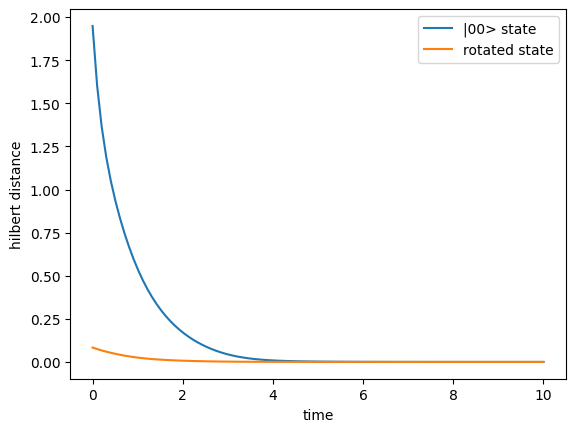

In [138]:
# calculation of Hilbert Distances

hilbert_distance = []

qmpe_dist = []

for state in medata.states:
  dis = qt.hilbert_dist(state,final_state)
  hilbert_distance.append(dis)

for state in qmpedata.states:
  dis = qt.hilbert_dist(state,final_state)
  qmpe_dist.append(dis)

plt.plot(tlist,hilbert_distance,label=r'|00> state')
plt.plot(tlist,qmpe_dist,label='rotated state')
plt.xlabel('time')
plt.ylabel('hilbert distance')
plt.legend()
plt.show()